In [2]:

# Import Packages
from pandas import read_csv
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np
from sklearn.preprocessing import LabelEncoder


In [3]:
pip install ucimlrepo

In [4]:
# Print metadata and variable information to inspect where the column names are stored
from ucimlrepo import fetch_ucirepo
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)
print(breast_cancer_wisconsin_diagnostic.metadata)
print(breast_cancer_wisconsin_diagnostic.variables)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [5]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Fetch the dataset from the UC Irvine repository
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Extract feature and target names
features = breast_cancer_wisconsin_diagnostic.variables['name'][2:]  # Skipping 'ID' and 'Diagnosis'
target = 'Diagnosis'

# Create a DataFrame for the features
dataset = pd.DataFrame(breast_cancer_wisconsin_diagnostic.data.features, columns=features)

# Add the target column (diagnosis) to the dataset
dataset[target] = breast_cancer_wisconsin_diagnostic.data.targets

# Verify the dataset
print(dataset.head(1))


name  radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0       17.99     10.38       122.8  1001.0       0.1184        0.2776   

name  concavity1  concave_points1  symmetry1  fractal_dimension1  ...  \
0         0.3001           0.1471     0.2419             0.07871  ...   

name  texture3  perimeter3   area3  smoothness3  compactness3  concavity3  \
0        17.33       184.6  2019.0       0.1622        0.6656      0.7119   

name  concave_points3  symmetry3  fractal_dimension3  Diagnosis  
0              0.2654     0.4601              0.1189          M  

[1 rows x 31 columns]


In [6]:
print(dataset.head(2))

name  radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0       17.99     10.38       122.8  1001.0      0.11840       0.27760   
1       20.57     17.77       132.9  1326.0      0.08474       0.07864   

name  concavity1  concave_points1  symmetry1  fractal_dimension1  ...  \
0         0.3001          0.14710     0.2419             0.07871  ...   
1         0.0869          0.07017     0.1812             0.05667  ...   

name  texture3  perimeter3   area3  smoothness3  compactness3  concavity3  \
0        17.33       184.6  2019.0       0.1622        0.6656      0.7119   
1        23.41       158.8  1956.0       0.1238        0.1866      0.2416   

name  concave_points3  symmetry3  fractal_dimension3  Diagnosis  
0              0.2654     0.4601             0.11890          M  
1              0.1860     0.2750             0.08902          M  

[2 rows x 31 columns]


In [7]:
dataset[target]

,Diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [8]:
type(dataset)

pandas.core.frame.DataFrame

In [9]:
print(dataset.columns)


Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis'],
      dtype='object', name='name')


In [10]:
X = dataset.drop(columns=['Diagnosis'])  # Exclude the target variable
y = dataset['Diagnosis']  # Target variable

In [11]:
# # Split-out validation dataset
# array = dataset.values
# X = array[:,0:-1]
# y = array[:,0:-1]
# X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)


In [12]:
y_flattened = y.values.ravel() if y.ndim > 1 else y # Flatten y if it's not already 1D

In [13]:
# Encode labels (M and B to integers)
le = LabelEncoder()
y_encoded = le.fit_transform(y_flattened)

In [14]:
# Split the dataset into training and validation sets
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y_encoded, test_size=0.20, random_state=1, shuffle=True)

In [15]:
from imblearn.over_sampling import SMOTE
SMOTE = SMOTE()

X_train_resampled, Y_train_resampled = SMOTE.fit_resample(X_train, Y_train)

In [16]:
value_counts = pd.Series(Y_train_resampled).value_counts()
print(value_counts)
#Y_train_resampled.value_counts()

1    285
0    285
Name: count, dtype: int64


In [17]:
X_train_resampled.shape

(570, 30)

In [18]:
X_validation.shape

(114, 30)

In [19]:
l=[1,"Hello",[1,3,4]]
l[1]

'Hello'

In [20]:
# Spot Check Algorithms
models = []

models.append(('LR', OneVsRestClassifier(LogisticRegression(solver='liblinear'))))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))


In [21]:
for i,j in models:
  print(j)

OneVsRestClassifier(estimator=LogisticRegression(solver='liblinear'))
LinearDiscriminantAnalysis()
KNeighborsClassifier()
DecisionTreeClassifier()
GaussianNB()
SVC(gamma='auto')


LR: 0.963158 (0.007443)
LDA: 0.963158 (0.011370)
KNN: 0.926316 (0.015494)
CART: 0.943860 (0.012405)
NB: 0.928070 (0.006564)
SVM: 0.607018 (0.015092)
Best Model: OneVsRestClassifier with Accuracy: 0.9632


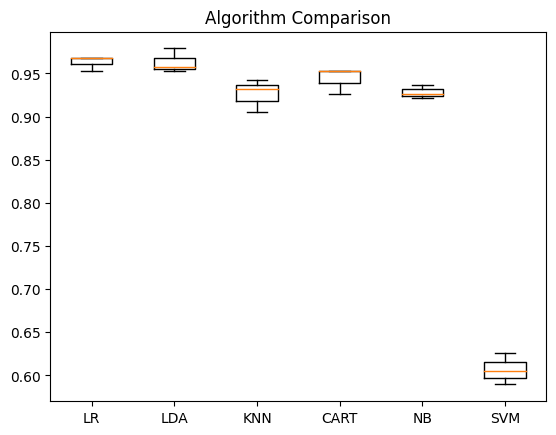

In [52]:
# evaluate each model in turn
results = []
names = []
best_model = None
best_accuracy = 0
for name, model in models:
    kfold = StratifiedKFold(n_splits=3, random_state=1, shuffle=True)


    # Reshape Y_train to a single column if it has multiple columns
    if Y_train_resampled.ndim > 1 and Y_train_resampled.shape[1] > 1:
        Y_train_resampled = Y_train_resampled[:, 0]  # Assuming the first column is the target variable

    # Check and convert the data type of Y_train
    if not isinstance(Y_train, (np.ndarray, pd.Series)):
        Y_train_resampled = np.array(Y_train_resampled)  # Convert to NumPy array

    # **Check if Y_train has continuous values and convert to discrete labels if necessary**
    if Y_train_resampled.dtype.kind in 'f':  # Check if Y_train has floating-point values
        # Convert to discrete labels using a suitable method, e.g., binning or thresholding
        # Example: Binning into two classes based on a threshold
        threshold = np.median(Y_train_resampled)
        Y_train_resampled = np.where(Y_train_resampled > threshold, 1, 0)  # Replace with your own logic

    # Convert to suitable data type if not already integer labels
    if Y_train_resampled.dtype not in (np.int64, np.int32):
        Y_train_resampled = Y_train_resampled.astype(int)

    cv_results = cross_val_score(model, X_train_resampled, Y_train_resampled, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    if cv_results.mean() > best_accuracy:
        best_accuracy = cv_results.mean()
        best_model = model

# Set the final_model to the best performing model
final_model = best_model
print(f"Best Model: {type(final_model).__name__} with Accuracy: {best_accuracy:.4f}")
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [53]:
X_train

name,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
408,17.99,20.66,117.80,991.7,0.10360,0.13040,0.120100,0.088240,0.1992,0.06069,...,21.080,25.41,138.10,1349.0,0.14820,0.37350,0.33010,0.19740,0.3060,0.08503
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
307,9.00,14.40,56.36,246.3,0.07005,0.03116,0.003681,0.003472,0.1788,0.06833,...,9.699,20.07,60.90,285.5,0.09861,0.05232,0.01472,0.01389,0.2991,0.07804
386,12.21,14.09,78.78,462.0,0.08108,0.07823,0.068390,0.025340,0.1646,0.06154,...,13.130,19.29,87.65,529.9,0.10260,0.24310,0.30760,0.09140,0.2677,0.08824
404,12.34,14.95,78.29,469.1,0.08682,0.04571,0.021090,0.020540,0.1571,0.05708,...,13.180,16.85,84.11,533.1,0.10480,0.06744,0.04921,0.04793,0.2298,0.05974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,19.79,25.12,130.40,1192.0,0.10150,0.15890,0.254500,0.114900,0.2202,0.06113,...,22.630,33.58,148.70,1589.0,0.12750,0.38610,0.56730,0.17320,0.3305,0.08465
144,10.75,14.97,68.26,355.3,0.07793,0.05139,0.022510,0.007875,0.1399,0.05688,...,11.950,20.72,77.79,441.2,0.10760,0.12230,0.09755,0.03413,0.2300,0.06769
72,17.20,24.52,114.20,929.4,0.10710,0.18300,0.169200,0.079440,0.1927,0.06487,...,23.320,33.82,151.60,1681.0,0.15850,0.73940,0.65660,0.18990,0.3313,0.13390
235,14.03,21.25,89.79,603.4,0.09070,0.06945,0.014620,0.018960,0.1517,0.05835,...,15.330,30.28,98.27,715.5,0.12870,0.15130,0.06231,0.07963,0.2226,0.07617


In [24]:
Y_train

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

In [54]:
Y_train_resampled

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

In [25]:
X

name,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [26]:
y

,Diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [61]:
# final_model.fit(X_train_resampled, Y_train_resampled)
final_model = LinearDiscriminantAnalysis()
final_model.fit(X_train_resampled, Y_train_resampled)

LinearDiscriminantAnalysis()

In [65]:
# new_data = np.array([[17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776,
#                       0.3001, 0.1471, 0.2419, 0.07871,
#                       17.33, 184.6, 2019.0, 0.1622, 0.6656,
#                       0.7119, 0.2654, 0.4601, 0.1189,
#                       15.67, 150.5, 180.0, 0.175, 0.675,  # Features 21-25
#                       0.25, 0.30, 0.25, 0.40, 0.130,  # Features 26-30
#                       0.550]])  # Final feature


In [29]:
# new_data = np.array([[10.99, 19.38, 192.8, 1101.0, 0.1200, 0.2776,
#                       0.3001, 0.1471, 0.2419, 0.07871,
#                       17.33, 184.6, 2019.0, 0.1622, 0.6656,
#                       0.6119, 0.2154, 0.6601, 0.1289,
#                       15.67, 159.5, 180.0, 0.175, 0.675,  # Features 21-25
#                       0.25, 0.30, 0.15, 0.10, 0.130,  # Features 26-30
#                       0.250]])  # Final feature


In [56]:
print(dataset['Diagnosis'].value_counts())



Diagnosis
B    357
M    212
Name: count, dtype: int64


-> Generating random test data for X to check if the model is working or not !

In [66]:
# # Make the prediction
# new_data_df = pd.DataFrame(new_data, columns=X.columns)

# prediction = final_model.predict(new_data_df)

# # Get predicted probabilities
# predicted_probabilities = final_model.predict_proba(new_data_df)

# # Print the prediction and probabilities
# predicted_diagnosis = "M" if prediction[0] == 0 else "B"
# print(f"Predicted Diagnosis: {predicted_diagnosis}")
# print(f"Predicted Probabilities: {predicted_probabilities}")

columns_to_drop = ['Diagnosis']  # Only 'Diagnosis' should be dropped

# Get min and max values for each feature (excluding 'Diagnosis')
min_values = dataset.drop(columns=columns_to_drop).min()
max_values = dataset.drop(columns=columns_to_drop).max()
num_samples = 10  # Adjust the number of samples as needed

# Generate random values using normal distribution
random_values = np.random.normal(loc=(min_values + max_values) / 2,
                                 scale=(max_values - min_values) / 6,
                                 size=(num_samples, len(min_values)))

# Clip values to ensure they remain within min and max
random_values = np.clip(random_values, min_values.values, max_values.values)

# Convert to DataFrame
new_data_df = pd.DataFrame(random_values, columns=min_values.index)

# Make predictions for multiple samples
predictions = final_model.predict(new_data_df)
predicted_probabilities = final_model.predict_proba(new_data_df)

# Print predictions and probabilities
for i in range(num_samples):
    predicted_diagnosis = "M" if predictions[i] == 0 else "B"
    print(f"Sample {i + 1} - Predicted Diagnosis: {predicted_diagnosis}, Probabilities: {predicted_probabilities[i]}")

Sample 1 - Predicted Diagnosis: M, Probabilities: [1.00000000e+00 1.76868839e-15]
Sample 2 - Predicted Diagnosis: M, Probabilities: [1.00000000e+00 2.07138355e-29]
Sample 3 - Predicted Diagnosis: B, Probabilities: [0. 1.]
Sample 4 - Predicted Diagnosis: B, Probabilities: [0.02626174 0.97373826]
Sample 5 - Predicted Diagnosis: M, Probabilities: [1.00000000e+00 2.02868814e-15]
Sample 6 - Predicted Diagnosis: B, Probabilities: [0.10700898 0.89299102]
Sample 7 - Predicted Diagnosis: M, Probabilities: [9.99992208e-01 7.79201819e-06]
Sample 8 - Predicted Diagnosis: B, Probabilities: [0.1008859 0.8991141]
Sample 9 - Predicted Diagnosis: M, Probabilities: [1.00000000e+00 6.76623602e-11]
Sample 10 - Predicted Diagnosis: B, Probabilities: [0. 1.]


In [50]:
prr=final_model.predict(X_validation)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



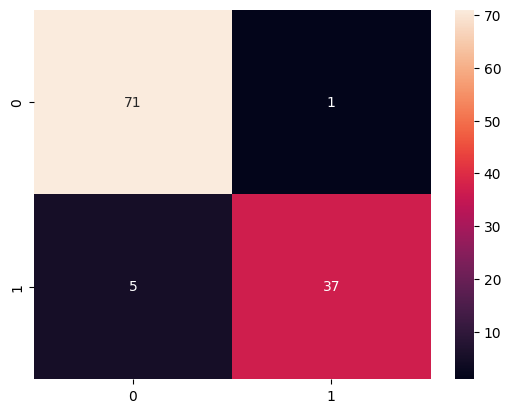

In [60]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(Y_validation,prr),annot=True)
print(classification_report(Y_validation,prr))


In [47]:
pr=final_model.predict(X_train_resampled)


              precision    recall  f1-score   support

           0       0.96      0.99      0.97       285
           1       0.99      0.96      0.97       285

    accuracy                           0.97       570
   macro avg       0.97      0.97      0.97       570
weighted avg       0.97      0.97      0.97       570



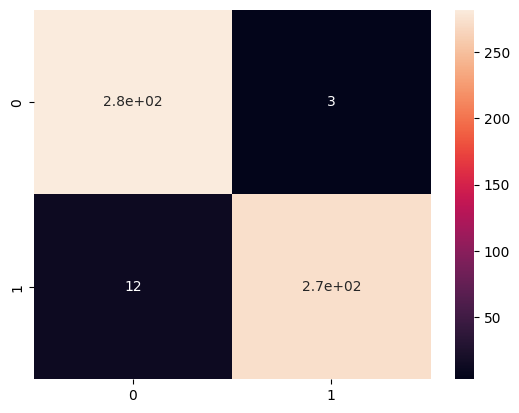

In [48]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(Y_train_resampled,pr),annot=True)
print(classification_report(Y_train_resampled,pr))


In [34]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
import os
os.getcwd()

'/content'

In [36]:
os.chdir('/content/drive/My Drive/Elements Of AI')
os.getcwd()

'/content/drive/My Drive/Elements Of AI'

In [37]:
os.listdir()

['iris.csv', 'LAB-2.ipynb']

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA, FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

import pandas as pd
from ucimlrepo import fetch_ucirepo

# Fetch the dataset from the UC Irvine repository
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Extract feature and target names
features = breast_cancer_wisconsin_diagnostic.variables['name'][2:]  # Skipping 'ID' and 'Diagnosis'
target = 'Diagnosis'

# Create a DataFrame for the features
dataset = pd.DataFrame(breast_cancer_wisconsin_diagnostic.data.features, columns=features)

# Add the target column (diagnosis) to the dataset
dataset[target] = breast_cancer_wisconsin_diagnostic.data.targets


X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [40]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# LDA
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

# ICA
ica = FastICA(n_components=2)
X_ica = ica.fit_transform(X_scaled)

# Plotting the results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# PCA plot
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
ax[0].set_title('PCA')
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')

# LDA plot
ax[1].scatter(X_lda[:, 0], [0] * len(X_lda), c=y, cmap='viridis')
ax[1].set_title('LDA')
ax[1].set_xlabel('LDA Component 1')
ax[1].set_ylabel('LDA Component 2')

# ICA plot
ax[2].scatter(X_ica[:, 0], X_ica[:, 1], c=y, cmap='viridis')
ax[2].set_title('ICA')
ax[2].set_xlabel('Independent Component 1')
ax[2].set_ylabel('Independent Component 2')

plt.tight_layout()
plt.show()

ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

In [70]:
!cp /content/drive/MyDrive/Colab\ Notebooks/'Breast_Cancer_(K_Fold).ipynb' /content/drive/MyDrive/'Elements Of AI'